In [32]:
import pandas as pd
import geopandas as gpd
import requests
%matplotlib inline

Uit email Roy  

VK = Galathea
VOSM = Vossemeer
SPUI = ingang spuikanaal
BBDT = Bathse brug
RAKN = Rak Noord
RAKZ = Rak Zuid
b = boven
o = onder 
WT = waterstand, cm t.o.v. NAP
Q = debiet, m3/s
CL = chloridegehalte, mg/l

# Metadata RWS

In [36]:
url = 'https://waterwebservices.rijkswaterstaat.nl/METADATASERVICES_DBO/OphalenCatalogus/'
json = {"CatalogusFilter": {
        "Eenheden": True,
        "Grootheden": True,
        "Hoedanigheden": True,
        "Compartimenten": True,
        "Compartimenten": True}}

r = requests.post(url, json=json, verify=False)
locs = pd.DataFrame(r.json()['LocatieLijst'])
meta = pd.DataFrame()

mtpnt = {'WT': ['VK', 'VOSM', 'SPUI', 'BBDT', 'BSBSZ', 'RAKZ', 'RAKN'], 'Q': ['VG02', 'VG03', 'BSBSD'], 'CL': ['VOLKb', 'VOLKo', 'VKb', 'VKo', 'VOSMb', 'VOSMo', 'SPUIb', 'SPUIo', 'BBDTb', 'BBDTo']}
for i in ['WT', 'Q', 'CL']:
    loc = locs.loc[locs.Code.isin(mtpnt.get(i)), :].copy()
    loc.at[:, 'GROOTHEID'] = i
    meta = meta.append(loc)
meta = gpd.GeoDataFrame(meta, geometry=gpd.points_from_xy(meta.X, meta.Y))
meta.crs = {'init': 'EPSG:25831'}
meta = meta.to_crs({'init': 'epsg:4326'})
meta['lat'] = meta.geometry.y
meta['lon'] = meta.geometry.x
meta

S:\WinPython 3.6\python-3.6.2.amd64\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Locatie_MessageID Coordinatenstelsel              X             Y  \
385               83719              25831  585924.040678  5.694275e+06   
744               83337              25831  583254.246766  5.715603e+06   
753               83641              25831  598265.756130  5.728061e+06   
1168              83137              25831  591082.649256  5.723262e+06   
1538              82980              25831  585156.455736  5.702033e+06   
1876              83625              25831  596628.599829  5.726645e+06   
3045              83703              25831  585554.805943  5.697810e+06   
1507              90690              25831  596872.087435  5.727762e+06   
1868              86416              25831  585894.447697  5.694264e+06   
2266              90693              25831  596924.356201  5.727694e+06   
440               86282              25831  583254.246766  5.715603e+06   
1471              86066              25831  585554.805943  5.697810e+06   
1552              86233              25831  585156.455736  5.702033e+06   
1553              86256              25831  591082.649256  5.723262e+06   
1554              86279              25831  596949.892610  5.727861e+06   
1555              86285              25831  583254.246766  5.715603e+06   
1922              86226              25831  585156.455736  5.702033e+06   
1923              86275              25831  596949.892610  5.727861e+06   
2219              86057              25831  585554.805943  5.697810e+06   
2722              86259              25831  591082.649256  5.723262e+06   

                           Naam   Code GROOTHEID                  geometry  \
385     Bathse spuisluis kanaal  BSBSZ        WT  POINT (4.23501 51.39320)   
744             Nieuw Vossemeer   VOSM        WT  POINT (4.20167 51.58533)   
753                   Rak Noord   RAKN        WT  POINT (4.42178 51.69489)   
1168          Volkerak Galathee     VK        WT  POINT (4.31663 51.65297)   
1538   Bathse spuikanaal Inloop   SPUI        WT  POINT (4.22584 51.46305)   
1876                   Rak Zuid   RAKZ        WT  POINT (4.39771 51.68245)   
3045      Bathse brug Deltanuts   BBDT        WT  POINT (4.23056 51.42503)   
1507              Volkerakgat 2   VG02         Q  POINT (4.40154 51.69245)   
1868         Bathse spuisluis D  BSBSD         Q  POINT (4.23458 51.39310)   
2266              Volkerakgat 3   VG03         Q  POINT (4.40228 51.69182)   
440         Nieuw Vossemeer (b)  VOSMb        CL  POINT (4.20167 51.58533)   
1471  Bathse brug Deltanuts (o)  BBDTo        CL  POINT (4.23056 51.42503)   
1552  Bathse spuikan. Inloop (o  SPUIo        CL  POINT (4.22584 51.46305)   
1553      Volkerak Galathee (b)    VKb        CL  POINT (4.31663 51.65297)   
1554         Volkerak Noord (o)  VOLKo        CL  POINT (4.40269 51.69333)   
1555        Nieuw Vossemeer (o)  VOSMo        CL  POINT (4.20167 51.58533)   
1922  Bathse spuikan. Inloop (b  SPUIb        CL  POINT (4.22584 51.46305)   
1923         Volkerak Noord (b)  VOLKb        CL  POINT (4.40269 51.69333)   
2219  Bathse brug Deltanuts (b)  BBDTb        CL  POINT (4.23056 51.42503)   
2722      Volkerak Galathee (o)    VKo        CL  POINT (4.31663 51.65297)   

            lat       lon  
385   51.393198  4.235008  
744   51.585328  4.201674  
753   51.694889  4.421779  
1168  51.652967  4.316628  
1538  51.463054  4.225843  
1876  51.682445  4.397707  
3045  51.425030  4.230555  
1507  51.692446  4.401538  
1868  51.393100  4.234580  
2266  51.691823  4.402275  
440   51.585328  4.201674  
1471  51.425030  4.230555  
1552  51.463054  4.225843  
1553  51.652967  4.316628  
1554  51.693328  4.402691  
1555  51.585328  4.201674  
1922  51.463054  4.225843  
1923  51.693328  4.402691  
2219  51.425030  4.230555  
2722  51.652967  4.316628

In [40]:
import folium
from folium.plugins import MarkerCluster

# initiate map
m = folium.Map(location=[51.6, 4.2], zoom_start=10, tiles='cartodbpositron')

# colors per measurementpoint
coldict = {'WT': 'red',
           'Q': 'green',
           'CL': 'blue'}

# add markers one-by-one
for point in meta.itertuples():
    folium.Marker([point.lat, point.lon], tooltip=folium.Tooltip('<table><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">Code</th><td style="padding: 4px;">{}</td></tr><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">Naam</th><td style="padding: 4px;">{}</td></tr></table>'.format(point.Code, point.Naam)), icon=folium.Icon(color=coldict.get(point.GROOTHEID), icon='square', prefix='fa')).add_to(m)

m.save('meta//rws.html')
m

# CSV

In [42]:
rws = pd.read_csv('data//export_VZM.csv')
rws['datetime'] = pd.to_datetime(rws['datetime'])
rws.set_index('datetime', inplace=True)
rws.head()

VK_WT  VOSM_WT  SPUI_WT  BBDT_WT  RAKN_WT  RAKZ_WT  VG_Q  \
datetime                                                                        
1996-01-01 00:00:00    NaN      NaN     -1.0      NaN      NaN     -2.0   NaN   
1996-01-01 00:10:00    NaN      NaN     -2.0      NaN      NaN     -2.0   NaN   
1996-01-01 00:20:00    NaN      NaN     -2.0      NaN      NaN     -2.0   NaN   
1996-01-01 00:30:00    NaN      NaN     -2.0      NaN      NaN     -2.0   NaN   
1996-01-01 00:40:00    NaN      NaN     -2.0      NaN      NaN     -1.0   NaN   

                     BSBSD_Q_corr_aang  VKb_CL  VKo_CL  VOSMb_CL  VOSMo_CL  \
datetime                                                                     
1996-01-01 00:00:00                0.0     NaN     NaN       NaN       NaN   
1996-01-01 00:10:00                0.0     NaN     NaN       NaN       NaN   
1996-01-01 00:20:00                0.0     NaN     NaN       NaN       NaN   
1996-01-01 00:30:00                0.0     NaN     NaN       NaN       NaN   
1996-01-01 00:40:00                0.0     NaN     NaN       NaN       NaN   

                     SPUIb_CL  SPUIo_CL  BBDTb_CL  BBDTo_CL  
datetime                                                     
1996-01-01 00:00:00       NaN       NaN       NaN       NaN  
1996-01-01 00:10:00       NaN       NaN       NaN       NaN  
1996-01-01 00:20:00       NaN       NaN       NaN       NaN  
1996-01-01 00:30:00       NaN       NaN       NaN       NaN  
1996-01-01 00:40:00       NaN       NaN       NaN       NaN

# Data

In [43]:
rws.describe()

VK_WT       VOSM_WT       SPUI_WT       BBDT_WT       RAKN_WT  \
count  1.129133e+06  1.190580e+06  1.184429e+06  1.172417e+06  1.180332e+06   
mean   3.575861e+00  3.392318e+00  2.630330e+00  2.431285e+00  4.885160e+01   
std    6.680474e+00  6.336284e+00  6.372178e+00  6.898855e+00  2.176907e+01   
min   -1.800000e+01 -1.800000e+01 -3.000000e+01 -5.000000e+01 -8.400000e+01   
25%   -1.000000e+00 -1.000000e+00 -2.000000e+00 -2.000000e+00  3.400000e+01   
50%    4.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  4.700000e+01   
75%    9.000000e+00  8.000000e+00  7.000000e+00  7.000000e+00  6.100000e+01   
max    5.000000e+01  5.100000e+01  5.300000e+01  6.300000e+01  2.150000e+02   

            RAKZ_WT           VG_Q  BSBSD_Q_corr_aang        VKb_CL  \
count  1.190681e+06  785495.000000       1.205294e+06  1.017596e+06   
mean   3.343040e+00       9.052461       1.713568e+01  2.534050e+02   
std    7.710909e+00      21.199819       4.280700e+01  7.631680e+01   
min   -1.600000e+02    -120.050000      -1.507169e+01  6.700000e+01   
25%   -1.000000e+00      -0.630000       0.000000e+00  2.000000e+02   
50%    3.000000e+00       1.390000       0.000000e+00  2.470000e+02   
75%    8.000000e+00      10.990000       0.000000e+00  2.940000e+02   
max    3.810000e+02    1224.820000       3.097740e+02  6.210000e+02   

             VKo_CL      VOSMb_CL      VOSMo_CL      SPUIb_CL      SPUIo_CL  \
count  1.027298e+06  1.030046e+06  1.034157e+06  1.022830e+06  1.019921e+06   
mean   2.605462e+02  3.704803e+02  3.705809e+02  4.316718e+02  4.340648e+02   
std    7.853940e+01  1.104727e+02  1.103000e+02  9.724209e+01  9.868498e+01   
min    8.000000e+01  1.290000e+02  7.400000e+01  1.750000e+02  1.790000e+02   
25%    2.060000e+02  2.980000e+02  2.990000e+02  3.740000e+02  3.740000e+02   
50%    2.540000e+02  3.610000e+02  3.600000e+02  4.260000e+02  4.280000e+02   
75%    3.040000e+02  4.360000e+02  4.360000e+02  4.960000e+02  5.000000e+02   
max    6.860000e+02  7.830000e+02  7.720000e+02  7.580000e+02  8.680000e+02   

           BBDTb_CL      BBDTo_CL  
count  1.017851e+06  1.019584e+06  
mean   4.508982e+02  4.526292e+02  
std    1.067227e+02  1.082352e+02  
min    4.700000e+01  1.820000e+02  
25%    3.870000e+02  3.880000e+02  
50%    4.360000e+02  4.390000e+02  
75%    5.140000e+02  5.140000e+02  
max    9.340000e+02  9.890000e+02

In [44]:
rws.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1209744 entries, 1996-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   VK_WT              1129133 non-null  float64
 1   VOSM_WT            1190580 non-null  float64
 2   SPUI_WT            1184429 non-null  float64
 3   BBDT_WT            1172417 non-null  float64
 4   RAKN_WT            1180332 non-null  float64
 5   RAKZ_WT            1190681 non-null  float64
 6   VG_Q               785495 non-null   float64
 7   BSBSD_Q_corr_aang  1205294 non-null  float64
 8   VKb_CL             1017596 non-null  float64
 9   VKo_CL             1027298 non-null  float64
 10  VOSMb_CL           1030046 non-null  float64
 11  VOSMo_CL           1034157 non-null  float64
 12  SPUIb_CL           1022830 non-null  float64
 13  SPUIo_CL           1019921 non-null  float64
 14  BBDTb_CL           1017851 non-null  float64
 15 

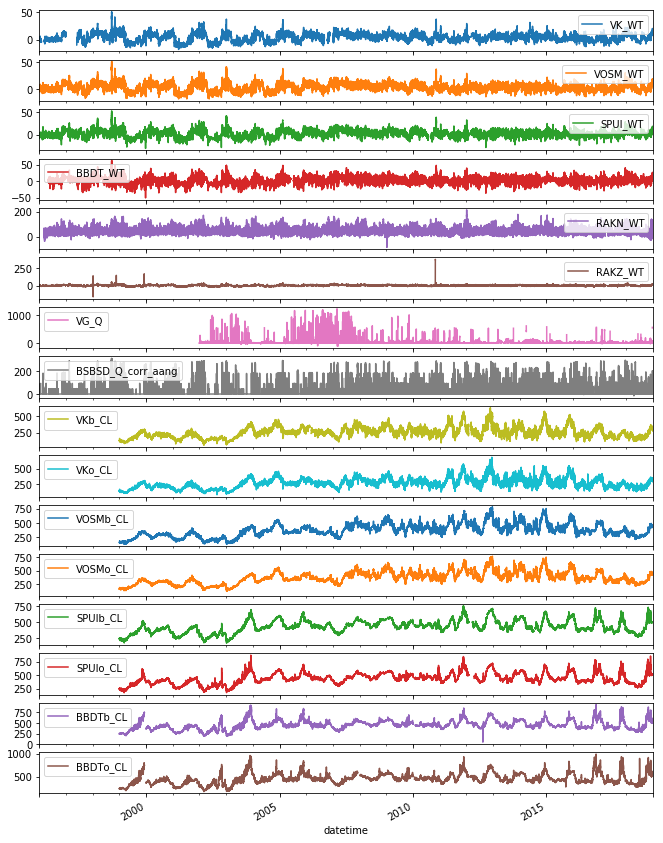

In [45]:
import matplotlib.pyplot as plt
rws.plot(subplots=True, figsize=(11,16)) # just a simple plot

In [49]:
rws.reset_index().to_feather('data//rws.feather') # save as feather

In [50]:
import pandas as pd
rws = pd.read_feather('data//rws.feather') # load feather
rws.set_index('datetime', inplace=True) # reset index